In [1]:
import os
import pandas as pd 

In [2]:
path = '../../Data/UK_Wide_Data'    

# find all csv file paths
csv_names = []

# loop all csv folders
for folder in os.listdir(path):
        
            # extract the CSVs in each folder
            folder_contents = os.listdir(f'{path}/{folder}')
            
            # loop through each file
            for file in folder_contents:
                
                    if "stop-and-search.csv" in file:

                        # add each csv file name    
                        csv_names.append(f'{path}/{folder}/{file}')

# print the number of CSVs -- 108
print(f'There are {len(csv_names)} different CSVs')

There are 1495 different CSVs


In [3]:
stops = []

# loop through the csvs
for csv in csv_names:
    
    # collect the stop and search data
    if "stop-and-search.csv" in csv:
        df = pd.read_csv(csv)
        df["source_file"] = csv  # Add column with the CSV filename
        stops.append(df)
    else:
        print(f'Error with CSV: {csv}')

# concat each df
stops_df = pd.concat(stops, ignore_index=True)

display(stops_df)


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file
0,Person search,2020-01-01T00:55:00+00:00,NaN,NaN,51.451062,-2.596436,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
1,Person search,2020-01-01T01:22:00+00:00,NaN,NaN,51.349567,-2.946702,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
2,Person search,2020-01-01T02:15:00+00:00,NaN,NaN,51.457808,-2.590766,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,True,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
3,Person and Vehicle search,2020-01-01T07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Male,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
4,Person and Vehicle search,2020-01-01T07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Female,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...


In [4]:
stops_df['Year'] = stops_df['Date'].str.split('-').str[0]
# stops_df['Year'] = pd.to_datetime(stops_df['Year'])

stops_df = stops_df[stops_df['Year'] == '2022']








def smart_title(text):
    skip_words = {'and', 'or', 'the', 'of', 'in', 'on', 'at', 'for', 'by'}
    parts = text.split('-')
    new_parts = []
    for p in parts:
        if p.lower() in skip_words:
            new_parts.append(p.lower())
        else:
            new_parts.append(p.capitalize())
    return '-'.join(new_parts)

stops_df['source_file'] = stops_df['source_file'].str.split('/').str[5].str[8:-20].apply(smart_title)




stops_df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file,Year
1231174,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231175,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Pakistani,Asian,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231176,Person search,2022-01-01T00:08:00+00:00,NaN,NaN,51.491781,-2.519850,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,Avon-and-Somerset,2022
1231177,Person search,2022-01-01T00:30:00+00:00,NaN,NaN,51.453357,-2.597833,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Penalty Notice for Disorder,False,False,Avon-and-Somerset,2022
1231178,Person search,2022-01-01T00:58:00+00:00,NaN,NaN,51.454134,-2.595396,Male,18-24,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Avon-and-Somerset,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,West-Yorkshire,2022


In [5]:


stops_df = stops_df.dropna(subset=['Longitude'])






# stops_df['source_file'].str.split('.csv')



stops_df['source_file'].value_counts()

# stops_df

source_file
Metropolitan          130056
Merseyside             51268
West-Midlands          29680
Essex                  17456
West-Yorkshire         16658
Kent                   12453
Surrey                 10184
Btp                    10059
Hampshire               8346
Thames-Valley           7900
Lancashire              5960
Dyfed-Powys             5899
Hertfordshire           5470
Sussex                  5384
Leicestershire          5188
Northumbria             4819
Devon-and-Cornwall      4679
Cleveland               4388
Norfolk                 3931
Staffordshire           3833
Suffolk                 3740
South-Wales             3490
Durham                  3370
Bedfordshire            3341
North-Wales             3175
Cumbria                 3169
Northamptonshire        3152
Lincolnshire            3113
West-Mercia             3025
Cambridgeshire          2880
Avon-and-Somerset       2780
Derbyshire              2288
North-Yorkshire         1989
Gwent                   1844
Do

In [6]:
stops_df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file,Year
1231176,Person search,2022-01-01T00:08:00+00:00,NaN,NaN,51.491781,-2.519850,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,Avon-and-Somerset,2022
1231177,Person search,2022-01-01T00:30:00+00:00,NaN,NaN,51.453357,-2.597833,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Penalty Notice for Disorder,False,False,Avon-and-Somerset,2022
1231178,Person search,2022-01-01T00:58:00+00:00,NaN,NaN,51.454134,-2.595396,Male,18-24,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Avon-and-Somerset,2022
1231179,Person search,2022-01-01T01:24:00+00:00,NaN,NaN,51.465918,-2.610176,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,Avon-and-Somerset,2022
1231180,Person and Vehicle search,2022-01-01T01:42:00+00:00,NaN,NaN,51.504069,-2.482861,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Avon-and-Somerset,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,West-Yorkshire,2022


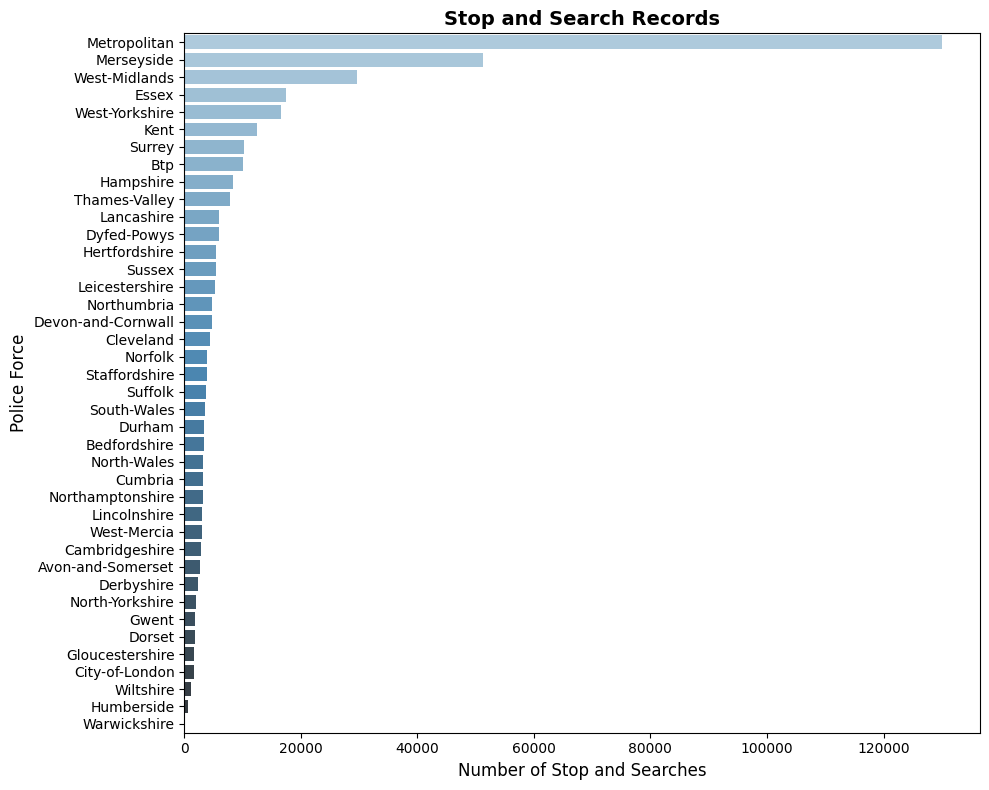

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
# sns.set(style="whitegrid")

# Get the counts and convert to DataFrame for hue compatibility
source_counts = stops_df['source_file'].value_counts().reset_index()
source_counts.columns = ['source_file', 'count']

# Plot using source_file as hue (even though it's just for colour)
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=source_counts,
    x='count',
    y='source_file',
    hue='source_file',
    dodge=False,
    palette='Blues_d',
    legend=False
)

# Add labels and title
plt.xlabel("Number of Stop and Searches", fontsize=12)
plt.ylabel("Police Force", fontsize=12)
plt.title("Stop and Search Records", fontsize=14, weight='bold')

# Add data labels
# for i, v in enumerate(source_counts['count']):
#     ax.text(v + max(source_counts['count']) * 0.01, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()


# Ethnic Make-ups:

In [10]:
ethnic = pd.read_csv('../../Data/LSOA_data/ONS/2021census_ethnic.csv')
ethnic

,date,geography,geography code,Ethnic group: Total: All usual residents,"Ethnic group: Asian, Asian British or Asian Welsh","Ethnic group: Asian, Asian British or Asian Welsh: Bangladeshi","Ethnic group: Asian, Asian British or Asian Welsh: Chinese","Ethnic group: Asian, Asian British or Asian Welsh: Indian","Ethnic group: Asian, Asian British or Asian Welsh: Pakistani","Ethnic group: Asian, Asian British or Asian Welsh: Other Asian",...,Ethnic group: Mixed or Multiple ethnic groups: Other Mixed or Multiple ethnic groups,Ethnic group: White,"Ethnic group: White: English, Welsh, Scottish, Northern Irish or British",Ethnic group: White: Irish,Ethnic group: White: Gypsy or Irish Traveller,Ethnic group: White: Roma,Ethnic group: White: Other White,Ethnic group: Other ethnic group,Ethnic group: Other ethnic group: Arab,Ethnic group: Other ethnic group: Any other ethnic group
0,2021,City of London 001A,E01000001,1474,158,4,66,49,2,37,...,18,1181,822,32,0,11,316,68,22,46
1,2021,City of London 001B,E01000002,1386,181,7,102,37,3,32,...,28,1084,734,42,0,6,302,50,13,37
2,2021,City of London 001C,E01000003,1612,153,11,52,37,3,50,...,44,1195,815,33,0,4,343,107,18,89
3,2021,City of London 001E,E01000005,1101,354,263,35,24,1,31,...,32,424,255,17,0,4,148,125,24,101
4,2021,Barking and Dagenham 016A,E01000006,1845,885,214,11,163,409,88,...,26,605,241,15,0,11,338,85,3,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35667,2021,Vale of Glamorgan 005G,W01002036,1552,47,3,15,11,7,11,...,17,1398,1308,9,0,3,78,14,11,3
35668,2021,Vale of Glamorgan 005H,W01002037,1065,23,5,3,2,5,8,...,7,993,912,6,0,0,75,8,1,7
35669,2021,Vale of Glamorgan 014G,W01002038,1265,9,0,2,2,1,4,...,7,1222,1210,2,0,0,10,2,0,2
35670,2021,Vale of Glamorgan 014H,W01002039,1760,21,0,4,4,5,8,...,10,1683,1633,14,1,0,35,2,1,1


In [27]:
ethnic['location'] = ethnic['geography'].apply(lambda x: ' '.join(x.split(' ')[:-1]))







ethnic#[ethnic['location'] == 'Greater London']

,date,geography,geography code,Ethnic group: Total: All usual residents,"Ethnic group: Asian, Asian British or Asian Welsh","Ethnic group: Asian, Asian British or Asian Welsh: Bangladeshi","Ethnic group: Asian, Asian British or Asian Welsh: Chinese","Ethnic group: Asian, Asian British or Asian Welsh: Indian","Ethnic group: Asian, Asian British or Asian Welsh: Pakistani","Ethnic group: Asian, Asian British or Asian Welsh: Other Asian",...,Ethnic group: White,"Ethnic group: White: English, Welsh, Scottish, Northern Irish or British",Ethnic group: White: Irish,Ethnic group: White: Gypsy or Irish Traveller,Ethnic group: White: Roma,Ethnic group: White: Other White,Ethnic group: Other ethnic group,Ethnic group: Other ethnic group: Arab,Ethnic group: Other ethnic group: Any other ethnic group,location
0,2021,City of London 001A,E01000001,1474,158,4,66,49,2,37,...,1181,822,32,0,11,316,68,22,46,City of London
1,2021,City of London 001B,E01000002,1386,181,7,102,37,3,32,...,1084,734,42,0,6,302,50,13,37,City of London
2,2021,City of London 001C,E01000003,1612,153,11,52,37,3,50,...,1195,815,33,0,4,343,107,18,89,City of London
3,2021,City of London 001E,E01000005,1101,354,263,35,24,1,31,...,424,255,17,0,4,148,125,24,101,City of London
4,2021,Barking and Dagenham 016A,E01000006,1845,885,214,11,163,409,88,...,605,241,15,0,11,338,85,3,82,Barking and Dagenham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35667,2021,Vale of Glamorgan 005G,W01002036,1552,47,3,15,11,7,11,...,1398,1308,9,0,3,78,14,11,3,Vale of Glamorgan
35668,2021,Vale of Glamorgan 005H,W01002037,1065,23,5,3,2,5,8,...,993,912,6,0,0,75,8,1,7,Vale of Glamorgan
35669,2021,Vale of Glamorgan 014G,W01002038,1265,9,0,2,2,1,4,...,1222,1210,2,0,0,10,2,0,2,Vale of Glamorgan
35670,2021,Vale of Glamorgan 014H,W01002039,1760,21,0,4,4,5,8,...,1683,1633,14,1,0,35,2,1,1,Vale of Glamorgan
